In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\ASUS\Desktop\AJAY\Internship\drug_effects.csv')

In [3]:
data1 = pd.concat([data]*130, ignore_index=True)

In [4]:
data1.shape

(403910, 6)

In [5]:
data1=data1.iloc[0:400000,]

In [6]:
data1.shape

(400000, 6)

In [7]:
data1.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [8]:
from faker import Faker

In [9]:
fake_data=Faker()

In [10]:
from faker.providers.person.en import Provider

In [11]:
def random_genders(size, p=None):
    """Generate n-length ndarray of genders."""
    if not p:
        # default probabilities
        p = (0.54, 0.45, 0.01)
    gender = ("M", "F", "O")
    return np.random.choice(gender, size=400000, p=p)

In [12]:
gender = random_genders(size=400000)

In [13]:

def create_first_names(n):
    first_name = []
   
    for _ in range(0, n):
        first_name.append(fake_data.first_name())
    return first_name

In [14]:
first_name=create_first_names(400000)

In [15]:
def create_last_names(n):
    last_name = []
    for _ in range(0, n):
        last_name.append(fake_data.last_name())
    return last_name

In [16]:
last_name=create_last_names(400000)

In [17]:
age = np.random.randint(10, 99, size = 400000, dtype = 'int')

In [18]:
def create_race(n):
    race = []
    for _ in range(0, n):
        race.append(fake_data.random_element(elements = ("White", "Australoid", "Black", "Asian")))
    return race

In [19]:
races = create_race(400000)

In [20]:
patient_ID = np.random.randint(100000, 999999, size = 400000, dtype = 'int')

In [21]:
data3 = pd.DataFrame(list(zip(patient_ID, first_name, last_name, gender, age, races)),
                   columns = ['Patient_ID', 'First_Name', 'Last_Name', 'Gender', 'Age',
                              'Race'])

In [22]:
df=pd.concat([data1,data3],axis=1)

In [23]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects,Patient_ID,First_Name,Last_Name,Gender,Age,Race
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects,957713,Patricia,Moore,F,61,Australoid
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects,414147,Annette,Garcia,M,77,Black
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects,108594,Wendy,Paul,M,22,White
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects,550643,Laura,Hale,F,22,White
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects,183969,Alexander,Conley,M,73,Australoid
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2299,oxycontin,8,Highly Effective,chronic nerve pain from back surgery,Moderate Side Effects,467689,Jonathan,Green,F,96,Australoid
399996,2300,singulair,3,Marginally Effective,asthma,No Side Effects,571790,Michael,Fischer,F,92,Australoid
399997,2301,lumigan,8,Considerably Effective,sparse thin eyelashes,No Side Effects,469492,Ashley,Greene,O,10,Asian
399998,2302,temovate,7,Moderately Effective,dyshidrosis,No Side Effects,242451,Melissa,Mckinney,F,20,Asian


In [24]:
df.shape


(400000, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     400000 non-null  int64 
 1   urlDrugName    400000 non-null  object
 2   rating         400000 non-null  int64 
 3   effectiveness  400000 non-null  object
 4   condition      399872 non-null  object
 5   sideEffects    400000 non-null  object
 6   Patient_ID     400000 non-null  int64 
 7   First_Name     400000 non-null  object
 8   Last_Name      400000 non-null  object
 9   Gender         400000 non-null  object
 10  Age            400000 non-null  int64 
 11  Race           400000 non-null  object
dtypes: int64(4), object(8)
memory usage: 36.6+ MB


In [26]:
df.isna().sum()

Unnamed: 0         0
urlDrugName        0
rating             0
effectiveness      0
condition        128
sideEffects        0
Patient_ID         0
First_Name         0
Last_Name          0
Gender             0
Age                0
Race               0
dtype: int64

In [27]:
df=df.dropna()

In [28]:
df.shape

(399872, 12)

In [29]:
df=df.drop(['Unnamed: 0'],axis=1)

In [30]:
df['urlDrugName'].value_counts()

lexapro                8114
prozac                 5918
zoloft                 5795
retin-a                5794
propecia               4895
                       ... 
estring                 128
medroxyprogesterone     128
aralen                  128
glucophage-xr           128
nasarel                 128
Name: urlDrugName, Length: 502, dtype: int64

In [31]:
df['sideEffects'].value_counts()

Mild Side Effects                131207
No Side Effects                  119583
Moderate Side Effects             79053
Severe Side Effects               47504
Extremely Severe Side Effects     22525
Name: sideEffects, dtype: int64

In [32]:
df['Race'].value_counts()

Black         100229
Australoid    100066
Asian         100063
White          99514
Name: Race, dtype: int64

In [33]:
df.describe()

,rating,Patient_ID,Age
count,399872.000000,399872.000000,399872.000000
mean,7.007863,549219.410256,54.005107
std,2.936084,259756.210412,25.725554
min,1.000000,100001.000000,10.000000
25%,5.000000,324007.000000,32.000000
50%,8.000000,548256.000000,54.000000
75%,9.000000,774812.750000,76.000000
max,10.000000,999998.000000,98.000000


In [34]:
df['Name'] = df['First_Name'] + df['Last_Name']

In [35]:
df=df.drop(['First_Name','Last_Name'],axis=1)

In [36]:
labels=['Child','Teen','Aduld','Middle Age Adult','Senior Adult']
bins= [9,13,20,40,60,100]
df['Age_bin'] = pd.cut(df['Age'],bins=bins,labels=labels)

In [37]:
df.shape

(399872, 11)

In [38]:
df['Age_bin'].value_counts()

Senior Adult        170953
Aduld                89672
Middle Age Adult     89526
Teen                 31512
Child                18209
Name: Age_bin, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399872 entries, 0 to 399999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   urlDrugName    399872 non-null  object  
 1   rating         399872 non-null  int64   
 2   effectiveness  399872 non-null  object  
 3   condition      399872 non-null  object  
 4   sideEffects    399872 non-null  object  
 5   Patient_ID     399872 non-null  int64   
 6   Gender         399872 non-null  object  
 7   Age            399872 non-null  int64   
 8   Race           399872 non-null  object  
 9   Name           399872 non-null  object  
 10  Age_bin        399872 non-null  category
dtypes: category(1), int64(3), object(7)
memory usage: 33.9+ MB


In [40]:
agg_data={'Age':['min','max','mean','median'],'rating':['min','max','mean','median'],'urlDrugName':['size','nunique'],
          'effectiveness':['size','nunique'],'condition':['size','nunique'],'Gender':['size','nunique'],
          'Race':['size','nunique']}
df1 = df.groupby(['effectiveness','Race']).agg(agg_data)

df1.columns=['C_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['effectiveness','Race'],how='left')

In [41]:
agg_data={'Age':['min','max','mean','median'],'rating':['min','max','mean','median'],'urlDrugName':['size','nunique'],
          'effectiveness':['size','nunique'],'condition':['size','nunique'],'Gender':['size','nunique'],
          'Race':['size','nunique']}
df1 = df.groupby(['effectiveness','condition','Age_bin']).agg(agg_data)

df1.columns=['D_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['effectiveness','condition','Age_bin'],how='left')

In [42]:
agg_data={'Age':['min','max','mean','median'],'rating':['min','max','mean','median'],'urlDrugName':['size','nunique'],
          'effectiveness':['size','nunique'],'condition':['size','nunique'],'Gender':['size','nunique'],
          'Race':['size','nunique']}
df1 = df.groupby(['effectiveness','Gender','Age_bin','Race']).agg(agg_data)

df1.columns=['E_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['effectiveness','Gender','Age_bin','Race'],how='left')

In [43]:
agg_data={'Age':['min','max','mean','median'],'rating':['min','max','mean','median'],'urlDrugName':['size','nunique'],
          'effectiveness':['size','nunique'],'condition':['size','nunique'],'Gender':['size','nunique'],
          'Race':['size','nunique']}
df1 = df.groupby(['urlDrugName','Gender','Age_bin','Race']).agg(agg_data)

df1.columns=['F_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['urlDrugName','Gender','Age_bin','Race'],how='left')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399872 entries, 0 to 399871
Data columns (total 83 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   urlDrugName              399872 non-null  object  
 1   rating                   399872 non-null  int64   
 2   effectiveness            399872 non-null  object  
 3   condition                399872 non-null  object  
 4   sideEffects              399872 non-null  object  
 5   Patient_ID               399872 non-null  int64   
 6   Gender                   399872 non-null  object  
 7   Age                      399872 non-null  int64   
 8   Race                     399872 non-null  object  
 9   Name                     399872 non-null  object  
 10  Age_bin                  399872 non-null  category
 11  C_Age_min                399872 non-null  int64   
 12  C_Age_max                399872 non-null  int64   
 13  C_Age_mean               399872 non-null  fl

In [45]:
to_drop=[]
corr_matrix = df.drop(['Patient_ID','sideEffects'],axis=1).corr()
#print(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper   

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)


df.drop(to_drop,inplace=True,axis=1)

['C_rating_median', 'C_urlDrugName_nunique', 'C_effectiveness_size', 'C_condition_size', 'C_condition_nunique', 'C_Gender_size', 'C_Race_size', 'D_Age_max', 'D_Age_mean', 'D_Age_median', 'D_rating_median', 'D_effectiveness_size', 'D_condition_size', 'D_Gender_size', 'D_Race_size', 'E_Age_min', 'E_Age_max', 'E_Age_mean', 'E_Age_median', 'E_rating_max', 'E_rating_mean', 'E_rating_median', 'E_effectiveness_size', 'E_condition_size', 'E_condition_nunique', 'E_Gender_size', 'E_Race_size', 'F_Age_min', 'F_Age_max', 'F_Age_mean', 'F_Age_median', 'F_effectiveness_size', 'F_condition_size', 'F_Gender_size', 'F_Race_size']


In [46]:
df.shape

(399872, 48)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399872 entries, 0 to 399871
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   urlDrugName              399872 non-null  object  
 1   rating                   399872 non-null  int64   
 2   effectiveness            399872 non-null  object  
 3   condition                399872 non-null  object  
 4   sideEffects              399872 non-null  object  
 5   Patient_ID               399872 non-null  int64   
 6   Gender                   399872 non-null  object  
 7   Age                      399872 non-null  int64   
 8   Race                     399872 non-null  object  
 9   Name                     399872 non-null  object  
 10  Age_bin                  399872 non-null  category
 11  C_Age_min                399872 non-null  int64   
 12  C_Age_max                399872 non-null  int64   
 13  C_Age_mean               399872 non-null  fl

In [48]:

df.urlDrugName = df.urlDrugName.apply(lambda x: x.strip())
drugname = df['urlDrugName'].value_counts(ascending=False)
drugname

lexapro                8114
prozac                 5918
zoloft                 5795
retin-a                5794
propecia               4895
                       ... 
estring                 128
medroxyprogesterone     128
aralen                  128
glucophage-xr           128
nasarel                 128
Name: urlDrugName, Length: 502, dtype: int64

In [49]:
en1=df.groupby('Patient_ID').size()/len(df)
en2=df.groupby('Name').size()/len(df)
df.loc[:,'PatientID_en']=df['Patient_ID'].map(en1)
df.loc[:,'Name_en']=df['Name'].map(en2)

In [50]:
df.drop(['Patient_ID','Name'],axis=1,inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
df_cat=df[['urlDrugName','effectiveness','condition','Gender','Race','Age_bin']]

In [53]:
label_encoder = LabelEncoder()

In [54]:
mapping_dict ={} 
for col in df_cat: 
    df[col] = label_encoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(label_encoder.classes_, 
                        label_encoder.transform(label_encoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict)

{'urlDrugName': {'abilify': 0, 'accolate': 1, 'accupril': 2, 'accutane': 3, 'aciphex': 4, 'actiq': 5, 'actonel': 6, 'actos': 7, 'acyclovir': 8, 'aczone': 9, 'adcirca': 10, 'adderall': 11, 'adderall-xr': 12, 'adipex-p': 13, 'advair-diskus': 14, 'advair-hfa': 15, 'albuterol': 16, 'aldactone': 17, 'aldara': 18, 'alendronate': 19, 'alesse': 20, 'allegra': 21, 'allegra-d': 22, 'aloprim': 23, 'alprazolam': 24, 'ambien': 25, 'ambien-cr': 26, 'amerge': 27, 'amitiza': 28, 'amoxil': 29, 'amphetamine': 30, 'ampicillin': 31, 'anafranil': 32, 'androgel': 33, 'angeliq': 34, 'antivert': 35, 'aralen': 36, 'arava': 37, 'aricept': 38, 'arimidex': 39, 'armour-thyroid': 40, 'aromasin': 41, 'arthrotec': 42, 'asacol': 43, 'asmanex': 44, 'atacand': 45, 'atarax': 46, 'atenolol': 47, 'ativan': 48, 'atripla': 49, 'augmentin': 50, 'avage': 51, 'avapro': 52, 'avelox': 53, 'avita': 54, 'avodart': 55, 'axert': 56, 'aygestin': 57, 'azasan': 58, 'azelex': 59, 'azopt': 60, 'azor': 61, 'baciim': 62, 'baclofen': 63, 'ba

In [55]:
side_effects={'sideEffects':{'No Side Effects': 0,'Mild Side Effects': 1,'Moderate Side Effects': 2,
                             'Severe Side Effects': 3,'Extremely Severe Side Effects': 4}}

In [56]:
df=df.replace(side_effects)

In [57]:
df


,urlDrugName,rating,effectiveness,condition,sideEffects,Gender,Age,Race,Age_bin,C_Age_min,...,F_rating_mean,F_rating_median,F_urlDrugName_size,F_urlDrugName_nunique,F_effectiveness_nunique,F_condition_nunique,F_Gender_nunique,F_Race_nunique,PatientID_en,Name_en
0,166,4,1,797,1,0,61,1,3,10,...,5.454545,6.0,11,1,2,2,1,1,0.000003,0.000040
1,319,1,1,224,3,1,77,2,3,10,...,7.593220,9.0,118,1,3,10,1,1,0.000003,0.000015
2,345,10,1,819,0,1,22,3,0,10,...,10.000000,10.0,7,1,1,2,1,1,0.000003,0.000003
3,353,3,3,11,1,0,22,3,0,10,...,6.843137,8.0,51,1,4,9,1,1,0.000003,0.000008
4,259,2,3,492,3,1,73,1,3,10,...,5.291391,6.0,151,1,5,12,1,1,0.000003,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399867,325,8,1,290,2,0,96,1,3,10,...,7.457627,8.0,59,1,3,8,1,1,0.000005,0.000025
399868,403,3,3,156,0,0,92,1,3,10,...,5.947368,8.0,114,1,5,12,1,1,0.000003,0.000023
399869,255,8,0,1285,0,2,10,0,1,10,...,8.000000,8.0,1,1,1,1,1,1,0.000003,0.000010
399870,428,7,4,428,0,0,20,0,4,10,...,7.000000,7.0,6,1,1,1,1,1,0.000003,0.000013


In [58]:
X=df.drop(['sideEffects'],axis=1)
y=df['sideEffects']

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-0.70293908, -1.02444836, -0.22921074, ...,  0.        ,
        -0.66660062,  0.54964175],
       [ 0.33618956, -2.04621882, -0.22921074, ...,  0.        ,
        -0.66660062, -0.1225305 ],
       [ 0.51277351,  1.01909257, -0.22921074, ...,  0.        ,
        -0.66660062, -0.45861663],
       ...,
       [-0.09847863,  0.33791226, -0.98946686, ...,  0.        ,
        -0.66660062, -0.25696495],
       [ 1.07648382, -0.0026779 ,  2.05155763, ...,  0.        ,
        -0.66660062, -0.18974773],
       [-1.48398348,  0.33791226, -0.22921074, ...,  0.        ,
         0.8374899 ,  0.21355562]])

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [63]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precesion score is:',precision_score(y_test,y_pred,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred,average='macro'))
print('ROC AUC score is:',roc_auc_score(y_test,log.predict_proba(X_test) ,multi_class='ovo'))
confusion_matrix(y_test,y_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score is: 0.3554125473066471
Precesion score is: 0.24700693957926595
recall_score is: 0.2555713858087809
F1 score is: 0.2329027953758588
ROC AUC score is: 0.6441334752255939


array([[17686, 15375,   584,  2141,     0],
       [16007, 21006,   732,  1567,     0],
       [ 8963, 11587,   986,  2280,     0],
       [ 4032,  5970,  1268,  2958,     0],
       [ 1672,  2324,   775,  2049,     0]], dtype=int64)

In [65]:
cv=cross_val_score(log,X,y,cv=5)
cv
cv.mean()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.3589823783695628

In [63]:
from sklearn.model_selection import KFold,StratifiedKFold

In [67]:
cv = KFold(random_state=42, shuffle=True)
scores = cross_val_score(log, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.23497249580708596

In [68]:
cv=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(log, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.2357414895385545

In [69]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [70]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precesion score is:',precision_score(y_test,y_pred,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred,average='macro'))
print('ROC AUC score is:',roc_auc_score(y_test,dt.predict_proba(X_test) ,multi_class='ovo'))
confusion_matrix(y_test,y_pred)

Accuracy score is: 0.9467914839699239
Precesion score is: 0.9489254811839419
recall_score is: 0.9483972282678899
F1 score is: 0.9486594064696968
ROC AUC score is: 0.9678705413510725


array([[34093,  1363,   214,    70,    46],
       [ 1480, 36816,   777,   212,    27],
       [  214,   750, 22657,   167,    28],
       [   50,   233,   201, 13531,   213],
       [   39,    39,    42,   218,  6482]], dtype=int64)

In [71]:
cv=cross_val_score(dt,X,y,cv=5)
cv

array([0.94740857, 0.94818381, 0.94849576, 0.94593243, 0.94702028])

In [72]:
cv = KFold(random_state=42, shuffle=True)
scores = cross_val_score(dt, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.9494090416943333

In [73]:
cv=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(dt, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.9493803823006901

In [64]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [75]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precesion score is:',precision_score(y_test,y_pred,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred,average='macro'))
print('ROC AUC score is:',roc_auc_score(y_test,rfc.predict_proba(X_test) ,multi_class='ovo'))
confusion_matrix(y_test,y_pred)

Accuracy score is: 0.948158583551458
Precesion score is: 0.9511136365280871
recall_score is: 0.9495600866142679
F1 score is: 0.9503310832018466
ROC AUC score is: 0.9970792395625372


array([[34097,  1376,   192,    73,    48],
       [ 1395, 37040,   649,   201,    27],
       [  192,   848, 22595,   155,    26],
       [   63,   266,   217, 13493,   189],
       [   34,    32,    25,   211,  6518]], dtype=int64)

In [76]:
cv=cross_val_score(rfc,X,y,cv=5)
cv
cv.mean()

0.948310960737138

In [77]:
cv = KFold(random_state=42, shuffle=True)
scores = cross_val_score(rfc, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.9503737207095577

In [78]:
cv=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(rfc, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.9501595025454644

In [79]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [80]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precesion score is:',precision_score(y_test,y_pred,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred,average='macro'))
print('ROC AUC score is:',roc_auc_score(y_test,gb.predict_proba(X_test) ,multi_class='ovo'))
confusion_matrix(y_test,y_pred)

Accuracy score is: 0.6507560727563728
Precesion score is: 0.6602073377126778
recall_score is: 0.6628484976259683
F1 score is: 0.6586958835498625
ROC AUC score is: 0.9024674365956292


array([[24361,  8128,  2161,   703,   433],
       [ 7597, 27631,  3143,   789,   152],
       [ 1438,  8051, 11760,  2055,   512],
       [  398,  1548,  2443,  8671,  1168],
       [    5,    92,   200,   880,  5643]], dtype=int64)

In [81]:
#cv=cross_val_score(gb,X,y,cv=5)
#cv

In [82]:
cv = KFold(random_state=42, shuffle=True,n_splits=5)
scores = cross_val_score(gb, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.660016162183741

In [83]:
cv=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(gb, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.6566617557068414

In [84]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [85]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precesion score is:',precision_score(y_test,y_pred,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred,average='macro'))
print('ROC AUC score is:',roc_auc_score(y_test,xgb.predict_proba(X_test) ,multi_class='ovo'))
confusion_matrix(y_test,y_pred)

Accuracy score is: 0.9442406762141344
Precesion score is: 0.9488780942792585
recall_score is: 0.9483919068149591
F1 score is: 0.9484090489976896
ROC AUC score is: 0.9975355035184335


array([[33742,  1756,   131,    94,    63],
       [ 1327, 37353,   430,   163,    39],
       [  137,  1401, 22090,   166,    22],
       [   19,   302,   233, 13414,   260],
       [    4,    12,    12,   118,  6674]], dtype=int64)

In [86]:
cv=cross_val_score(xgb,X,y,cv=5)
cv

array([0.94612066, 0.94345733, 0.94085578, 0.94390677, 0.94419436])

In [87]:
cv = KFold(random_state=42, shuffle=True)
scores = cross_val_score(xgb, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.9481653706223545

In [88]:
cv=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(xgb, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores.mean()

0.9481537983926046

In [65]:
from tpot import TPOTClassifier

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1000, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [10, 20],
               'min_samples_split': [10, 20],
               'n_estimators': list(np.linspace(100, 500, 10, dtype = int))}
               
tpot_classifier = TPOTClassifier(generations= 3, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters},  
                                 cv = 2, scoring = 'f1_macro')
tpot_classifier.fit(X_train,y_train) 

C:\Users\ASUS\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.9495656434323938

Generation 2 - Current best internal CV score: 0.9495656434323938

Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=16, min_samples_split=16, n_estimators=144)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      64,
                                                                                      118,
                                                                                      173,
                                                                                      227,
                                                                                      282,
                                                                                      336,
                                                                                      391,
                                                                                  

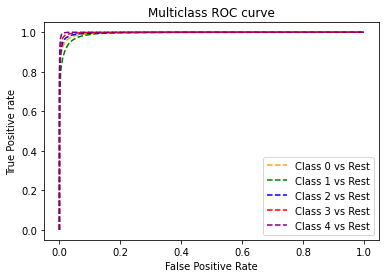

In [92]:
from sklearn.metrics import roc_curve
pred_prob = rfc.predict_proba(X_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=800);    